In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data
----------

In [174]:
df = pd.read_csv('../Notebooks/results_compiled.csv', )
DATASET = 'CIFAR'
df = df[df.Dataset == DATASET]
df.head()
print(df.shape)

(74, 19)


## Clean Up and Adding Derived Columns
---------

In [175]:
#df['Optimizer'] = pd.Series([x.strip() for x in df.Optimizer])
#df['ModelType'] = df['Model'] + "_" + df['Num_layers']
#df['Efficiency'] = (df['Best_test'] / (df['Best_test_at'] + 1))*np.sqrt((1e9 - df['Num_parameters']))
df.sort_values('Best_test')[df.Model == 'mlp']


C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_14528\3807206836.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values('Best_test')[df.Model == 'mlp']


,Unnamed: 0,Dataset,Backprop,Model,Num_layers,Batchsize,LearningRate,TotalEpochs,Num_parameters,Optimizer,Best_train,Best_test,Best_test_at,Avg_time,Initialization,AvgGenError,ModelType,ID,Efficiency
66,69,CIFAR,backprop,mlp,2layers,4096,0.0050,98,789770,Adam,0.637716,0.481689,32,28.240168,orthogonal_,0.083698,mlp_2layers,9000,0.001076
71,80,CIFAR,backprop,mlp,3layers,4096,0.0050,98,1708810,Adam,0.780253,0.490601,16,27.735329,orthogonal_,0.154313,mlp_3layers,9000,0.002012
65,68,CIFAR,backprop,mlp,2layers,4096,0.0005,98,789770,SGD,0.765950,0.490845,6,27.859788,orthogonal_,0.275516,mlp_2layers,9000,0.005168
63,66,CIFAR,backprop,mlp,2layers,4096,0.0005,98,789770,Adam,0.753113,0.501099,0,27.635656,orthogonal_,0.236940,mlp_2layers,9000,0.036932
64,67,CIFAR,backprop,mlp,2layers,4096,0.0005,98,789770,SGDM,0.714823,0.505737,8,27.830947,orthogonal_,0.208985,mlp_2layers,9000,0.004142
68,71,CIFAR,backprop,mlp,2layers,4096,0.0050,98,789770,SGD,0.713074,0.508423,16,27.850662,orthogonal_,0.201473,mlp_2layers,9000,0.002204
69,78,CIFAR,backprop,mlp,3layers,4096,0.0005,98,1708810,Adam,0.991984,0.508545,1,27.578566,orthogonal_,0.488436,mlp_3layers,9000,0.017724
70,79,CIFAR,backprop,mlp,3layers,4096,0.0005,98,1708810,SGDM,0.983785,0.509155,43,27.637512,orthogonal_,0.475234,mlp_3layers,9000,0.000807
73,82,CIFAR,backprop,mlp,3layers,4096,0.0050,98,1708810,SGD,0.981934,0.511230,12,27.742013,orthogonal_,0.468401,mlp_3layers,9000,0.002741
72,81,CIFAR,backprop,mlp,3layers,4096,0.0050,98,1708810,SGDM,0.809163,0.518311,21,27.931010,orthogonal_,0.181004,mlp_3layers,9000,0.001642


In [176]:
df['Best_test'] = df['Best_test'].astype('float32')

## Plotting Test Accuracy against Parameters
-----------

In [177]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

kan_
                Best_test
Num_parameters           
7890452          0.541626
17066516         0.535889
38040084         0.554688
---
mlp_
                Best_test
Num_parameters           
789770           0.533203
1708810          0.518311
---


C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_14528\3215500279.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.01, 1.02))


Text(0.5, 1.0, 'Test Acc under Backprop Training Schemes (CIFAR)')

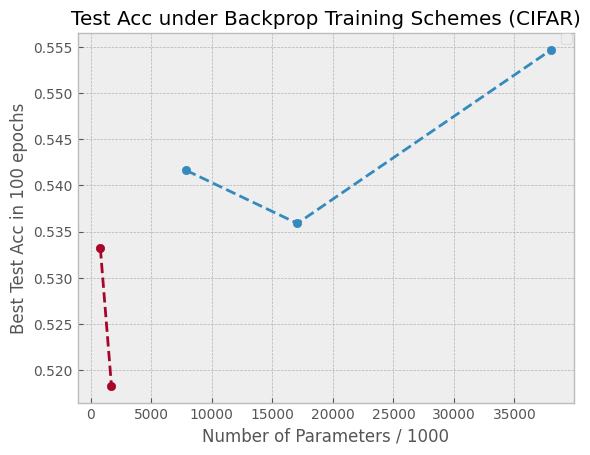

In [178]:
plt.style.use( 'bmh')

fig, axes = plt.subplots()

colors = [[0,0,.1], [0,0,.5], [0,0,1]]
for ma in ['kan_', 'mlp_']:
    print(ma)
    sq = df[df.ModelType.apply(lambda x: x[:4]) ==ma]
    sq = sq[['ModelType', 'Num_parameters', 'Best_test']]; label = list(sq.ModelType)[0]
    sq2 = sq.groupby('Num_parameters').max()
    sq2 = sq2[['Best_test']]; print(sq2)
    axes.scatter(sq2.index/1000, sq2.Best_test)
    axes.plot(sq2.index/1000, sq2.Best_test, linestyle = '--')
    #axes.plot(sq2.index/1000, sq2.Best_test, alpha = 1, linestyle='--', linewidth = 1.5, marker = 'o')
    print('---')


#for model in set(np.unique(df['ModelType'])):
#    sa = df[(df.ModelType ==model)]
#    axes.plot(np.min(sa.Num_parameters/1000), np.max(sa.Best_test), label = model)

#plt.ylim(0.8, 1)
plt.xlabel("Number of Parameters / 1000")
plt.ylabel("Best Test Acc in 100 epochs")
plt.legend(bbox_to_anchor=(1.01, 1.02))
plt.title("Test Acc under Backprop Training Schemes (" + DATASET + ")")


## Plotting Efficiency and Epoch Times
-------

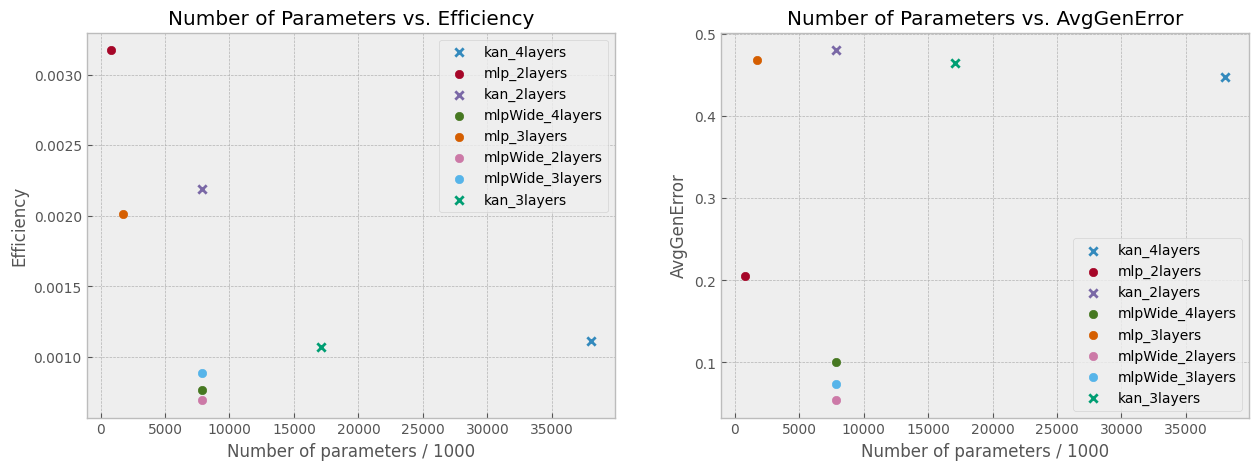

In [179]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5)); idx = 0
for metric in ['Efficiency', 'AvgGenError']:
    for model in set(np.unique(df['ModelType'])):
        sa = df[(df.ModelType ==model)]
        mark = 'o' if 'mlp' in model else 'x'
        axes[idx].scatter(np.max(sa.Num_parameters/1000), np.median(sa[metric]), marker = mark, label = model, alpha = 1)
        axes[idx].set_title("Number of Parameters vs. " + metric)
        axes[idx].set_xlabel("Number of parameters / 1000")
        axes[idx].set_ylabel(metric)
        axes[idx].legend()
    idx += 1

## Bar Plot of Best Achieved Model Performance Under Any Training Scheme
------------

Text(0, 0.5, 'Best Achieved Test Performance')

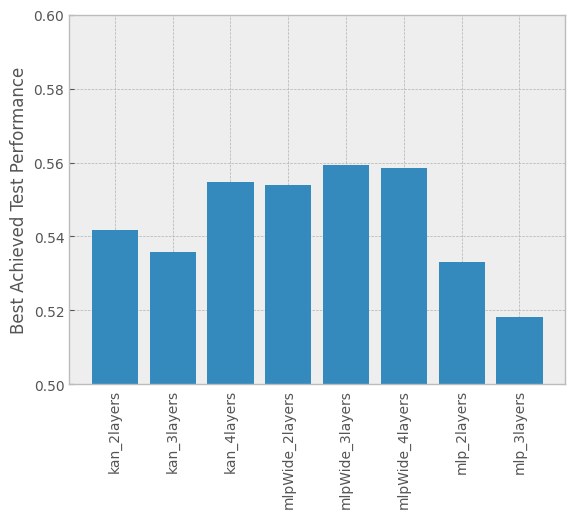

In [180]:
zs = df.groupby("ModelType", group_keys=True)[['Best_test']].max()
plt.bar(zs.index, zs.Best_test); plt.ylim(0.5,0.6)
plt.xticks(rotation = 90); plt.ylabel("Best Achieved Test Performance")

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

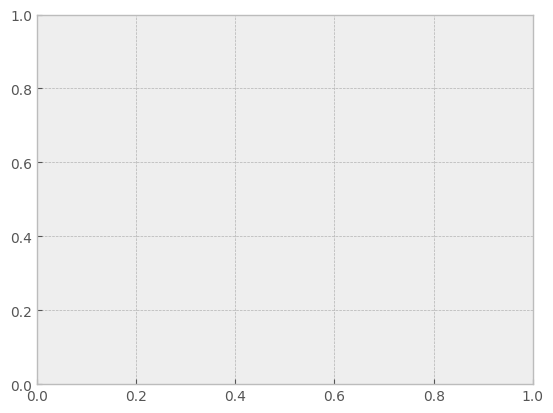

In [165]:
zs = df.groupby("ModelType", group_keys=True)[['Best_test']].max()


plt.boxplot(zs.index, zs.Best_test)
plt.xticks(rotation = 90)
plt.ylim(0.30, 1)
plt.title("Best Test Acc Under All Training Schemes")